In [231]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,classification_report

Load Data Set

In [232]:
df=sns.load_dataset('titanic')
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


Clean the data and Pre-Processing

In [233]:
df=df.drop(columns=['class','who','adult_male','deck','embark_town','alive','alone'])
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


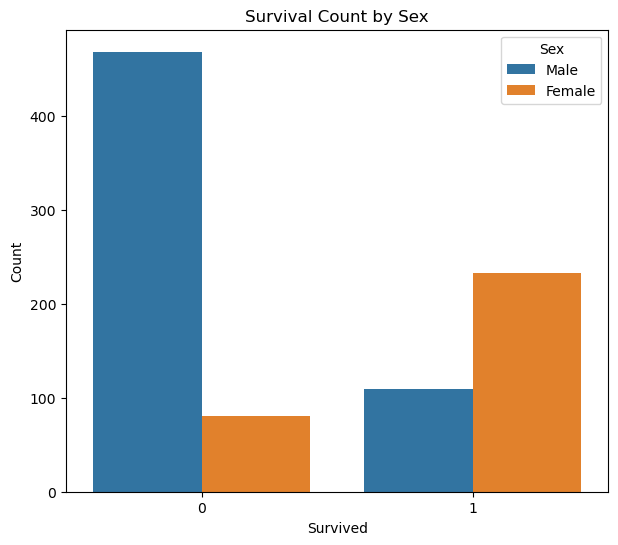

In [234]:
plt.figure(figsize=(7, 6))
sns.countplot(data=df,x='survived', hue='sex')

# Adding labels and title
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count by Sex')

# Adding legend
plt.legend(title='Sex', labels=['Male', 'Female'])

# Show the plot
plt.show()

In [235]:
df.dropna(subset=['age','embarked'],inplace=True)
df['sex']=df['sex'].map({'male':-1,'female':1})
df['embarked']=df['embarked'].map({'S':1,'C':2,'Q':3})
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,-1,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,2
2,1,3,1,26.0,0,0,7.9250,1
3,1,1,1,35.0,1,0,53.1000,1
4,0,3,-1,35.0,0,0,8.0500,1


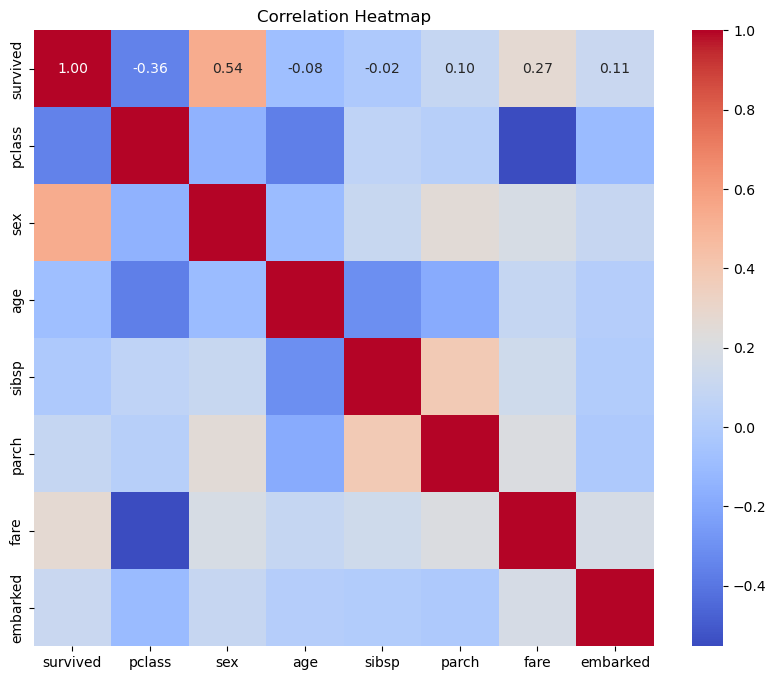

In [236]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Divide data set into x and y

In [237]:
x=df.drop(columns=['survived'])
y=df['survived']
print(x)

     pclass  sex   age  sibsp  parch     fare  embarked
0         3   -1  22.0      1      0   7.2500         1
1         1    1  38.0      1      0  71.2833         2
2         3    1  26.0      0      0   7.9250         1
3         1    1  35.0      1      0  53.1000         1
4         3   -1  35.0      0      0   8.0500         1
..      ...  ...   ...    ...    ...      ...       ...
885       3    1  39.0      0      5  29.1250         3
886       2   -1  27.0      0      0  13.0000         1
887       1    1  19.0      0      0  30.0000         1
889       1   -1  26.0      0      0  30.0000         2
890       3   -1  32.0      0      0   7.7500         3

[712 rows x 7 columns]


Divide data as train and test

In [238]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train)
print(x_test)

     pclass  sex   age  sibsp  parch     fare  embarked
472       2    1  33.0      1      2  27.7500         1
432       2    1  42.0      1      0  26.0000         1
666       2   -1  25.0      0      0  13.0000         1
30        1   -1  40.0      0      0  27.7208         2
291       1    1  19.0      1      0  91.0792         2
..      ...  ...   ...    ...    ...      ...       ...
93        3   -1  26.0      1      2  20.5750         1
135       2   -1  23.0      0      0  15.0458         2
338       3   -1  45.0      0      0   8.0500         1
549       2   -1   8.0      1      1  36.7500         1
131       3   -1  20.0      0      0   7.0500         1

[569 rows x 7 columns]
     pclass  sex   age  sibsp  parch      fare  embarked
641       1    1  24.0      0      0   69.3000         2
496       1    1  54.0      1      0   78.2667         2
262       1   -1  52.0      1      1   79.6500         1
311       1    1  18.0      2      2  262.3750         2
551       2   -1  2

In [239]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(569, 7)
(143, 7)
(569,)
(143,)


Normalize data set

In [240]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

Create the model and train data

In [241]:
model=LogisticRegression(random_state=42)
model.fit(x_train,y_train)


LogisticRegression(random_state=42)

Evaluate the model

In [242]:
y_pred=model.predict(x_test)
error=confusion_matrix(y_test,y_pred)
print('confusion_matrix:')
print(error)

confusion_matrix:
[[73  7]
 [22 41]]


In [243]:
y_pred.shape

(143,)

In [244]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7972027972027972
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.91      0.83        80
           1       0.85      0.65      0.74        63

    accuracy                           0.80       143
   macro avg       0.81      0.78      0.79       143
weighted avg       0.81      0.80      0.79       143



Example for prediction

In [245]:
def predict_survival(pclass, sex, age, sibsp, parch, fare, embarked):
    data = scaler.transform([[pclass, sex, age, sibsp, parch, fare, embarked]])
    prediction = model.predict(data)
    if prediction[0] == 1:
        return "Survived"
    else:
        return "Did not survive"

In [246]:
example_prediction = predict_survival(pclass=3, sex=-1, age=22, sibsp=1, parch=0, fare=7.25, embarked=1)
print("Example prediction:", example_prediction)

Example prediction: Did not survive


c:\Users\Singer\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
